<a href="https://colab.research.google.com/github/Bellahmer-hacene/data-science/blob/master/Real_Estate_Listings_Argentina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset
https://data.world/properati/real-estate-listings-argentina

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.callbacks import EarlyStopping

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv('https://query.data.world/s/rv6wwnpkczxomamscqqhcuyds5ltf6')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (19) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head()

,created_on,operation,property_type,place_name,place_with_parent_names,geonames_id,lat-lon,lat,lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
0,2012-09-19,sell,house,San Antonio De Padua,|Argentina|Bs.As. G.B.A. Zona Oeste|Merlo|San ...,3429244.0,"-34.6566088,-58.8069107",-34.656609,-58.806911,120000.0,USD,1819488.0,120000.0,333.0,93.0,360.360360,1290.322581,NaN,NaN,NaN,http://san-antonio-de-padua.properati.com.ar/u...,CASA CON LOCAL EN VENTA EN PADUA.2 DORMITORIOS...,CASA EN VENTA,https://thumbs-cf.properati.com/4/aKcEetbJUfrn...
1,2012-10-10,sell,apartment,Villa Crespo,|Argentina|Capital Federal|Villa Crespo|,3427458.0,"-34.6036844,-58.3815591",-34.603684,-58.381559,83000.0,USD,1258479.2,83000.0,40.0,40.0,2075.000000,2075.000000,1.0,2.0,300,http://villa-crespo.properati.com.ar/13tz_vent...,"2 AMBIENTES, VENTA, VILLA CRESPO1ER PISO POR E...",DEPARTAMENTO EN VENTA,https://thumbs-cf.properati.com/8/ujkSk81S7fhu...
2,2012-10-22,sell,apartment,San Bernardo,|Argentina|Buenos Aires Costa Atlántica|San Be...,3429228.0,"-36.6879204,-56.6780098",-36.687920,-56.678010,49000.0,USD,742957.6,49000.0,47.0,42.0,1042.553191,1166.666667,7.0,3.0,750,http://san-bernardo-buenos-aires-costa-atlanti...,Comodo departamento 3 ambientes ubicado en cal...,DEPARTAMENTO EN VENTA,https://thumbs-cf.properati.com/6/n5yiUwL9Gjw3...
3,2012-10-22,sell,house,Maschwitz,|Argentina|Bs.As. G.B.A. Zona Norte|Escobar|Ma...,NaN,"-34.3938943878,-58.7683713751",-34.393894,-58.768371,200000.0,USD,3032480.0,200000.0,250.0,200.0,800.000000,1000.000000,NaN,4.0,NaN,http://maschwitz.properati.com.ar/1w41_venta_c...,MUY BUENA CASA DE 3/4 DORMITORIOS Y CASA DE HU...,CASA EN VENTA,https://thumbs-cf.properati.com/4/KbG2PtmxJCVy...
4,2012-10-22,sell,house,San Antonio De Padua,|Argentina|Bs.As. G.B.A. Zona Oeste|Merlo|San ...,3429244.0,"-34.668175,-58.6996246",-34.668175,-58.699625,NaN,NaN,NaN,NaN,220.0,220.0,NaN,NaN,NaN,NaN,NaN,http://san-antonio-de-padua.properati.com.ar/2...,CHALET VENTA 4 AMBIENTES PADUA.EXCELENTE CHALE...,CASA EN VENTA,https://thumbs-cf.properati.com/7/3xCBy82O4-k1...


In [0]:
df = df.drop('image_thumbnail',axis=1)
df = df.drop('title',axis=1)
df = df.drop('description',axis=1)
df = df.drop('properati_url',axis=1)
df = df.drop('place_with_parent_names',axis=1)

#Les prix sont estimer on Dollars(USD) et Peso argentin(ARS)

In [5]:
df['currency'].value_counts()

USD    112799
ARS     10350
Name: currency, dtype: int64

#Ne garder que les estimation en Dollard (USD)

In [0]:
indexNames = df[ df['currency'] == 'ARS' ].index
 
df.drop(indexNames , inplace=True)
df = df.drop('currency',axis=1)
df = df.drop('price_aprox_local_currency',axis=1)
df = df.drop('price_per_m2',axis=1)
df = df.drop('price_aprox_usd',axis=1)
df = df.drop('operation',axis=1)

#données manquantes

In [7]:
100* df.isnull().sum()/len(df)

created_on                0.000000
property_type             0.000000
place_name                0.016987
geonames_id              15.408647
lat-lon                  19.337804
lat                      19.337804
lon                      19.338543
price                    16.686362
surface_total_in_m2      35.691812
surface_covered_in_m2    21.628089
price_usd_per_m2         48.818299
floor                    88.541190
rooms                    43.915715
expenses                 91.865463
dtype: float64

In [0]:
df = df.drop('expenses',axis=1)
df = df.drop('floor',axis=1)
df = df[df['price'].notna()]
df = df[df['rooms'].notna()]
df = df[df['price_usd_per_m2'].notna()]
df = df[df['lat'].notna()]
df = df[df['surface_covered_in_m2'].notna()]
df = df.drop('geonames_id',axis=1)
df = df.drop('lat-lon',axis=1)

In [9]:
len(df)

31451

#Variables de catégorie

In [10]:
df.head()

,created_on,property_type,place_name,lat,lon,price,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,rooms
1,2012-10-10,apartment,Villa Crespo,-34.603684,-58.381559,83000.0,40.0,40.0,2075.000000,2.0
2,2012-10-22,apartment,San Bernardo,-36.687920,-56.678010,49000.0,47.0,42.0,1042.553191,3.0
3,2012-10-22,house,Maschwitz,-34.393894,-58.768371,200000.0,250.0,200.0,800.000000,4.0
9,2012-12-08,house,Mataderos,-34.654903,-58.488955,170000.0,300.0,103.0,566.666667,5.0
22,2013-01-22,apartment,Haedo,40.620948,-78.911851,100000.0,43.0,36.0,2325.581395,2.0


In [11]:
df['property_type'].value_counts()

apartment    19287
house         9331
PH            2636
store          197
Name: property_type, dtype: int64

In [0]:
df = pd.concat([df,pd.get_dummies(df['property_type'],prefix="property_type")],axis=1)
df.drop('property_type', axis=1, inplace=True)

In [13]:
df.head()

,created_on,place_name,lat,lon,price,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,rooms,property_type_PH,property_type_apartment,property_type_house,property_type_store
1,2012-10-10,Villa Crespo,-34.603684,-58.381559,83000.0,40.0,40.0,2075.000000,2.0,0,1,0,0
2,2012-10-22,San Bernardo,-36.687920,-56.678010,49000.0,47.0,42.0,1042.553191,3.0,0,1,0,0
3,2012-10-22,Maschwitz,-34.393894,-58.768371,200000.0,250.0,200.0,800.000000,4.0,0,0,1,0
9,2012-12-08,Mataderos,-34.654903,-58.488955,170000.0,300.0,103.0,566.666667,5.0,0,0,1,0
22,2013-01-22,Haedo,40.620948,-78.911851,100000.0,43.0,36.0,2325.581395,2.0,0,1,0,0


In [14]:
df['place_name'].value_counts()

Mar del Plata                     4082
Punta del Este                    2287
Palermo                           1067
Belgrano                           977
Montevideo                         837
                                  ... 
Manuel Alberti                       1
Manzanares                           1
Barrio Privado El Recodo  S.A.       1
Barrio Lagos del Golf 1              1
General Alvarado                     1
Name: place_name, Length: 558, dtype: int64

In [15]:
df.corr()['price'].sort_values()

property_type_apartment   -0.137444
property_type_PH          -0.072158
lat                        0.034295
property_type_store        0.055202
lon                        0.111980
property_type_house        0.180774
price_usd_per_m2           0.297584
surface_total_in_m2        0.309192
rooms                      0.359765
surface_covered_in_m2      0.508136
price                      1.000000
Name: price, dtype: float64

In [0]:
df2 = df

In [0]:
counts = df2['place_name'].value_counts()
df2= df2[~df2['place_name'].isin(counts[counts < 100].index)]

In [19]:
df2['place_name'].value_counts()

Mar del Plata           4082
Punta del Este          2287
Palermo                 1067
Belgrano                 977
Montevideo               837
                        ... 
Martínez                 120
San Cristobal            119
Santos Lugares           116
Floresta                 110
San Antonio De Padua     102
Name: place_name, Length: 62, dtype: int64

In [20]:
len(df2)

25360

In [0]:
df2 = pd.concat([df2,pd.get_dummies(df2['place_name'],prefix="place_name")],axis=1)
df2.drop('place_name', axis=1, inplace=True)

In [22]:
df2.corr()['price'].sort_values()

property_type_apartment         -0.144899
place_name_Mar del Plata        -0.119411
property_type_PH                -0.066933
place_name_Caseros              -0.054975
place_name_General San Martín   -0.049949
                                   ...   
place_name_Punta del Este        0.319075
surface_total_in_m2              0.336928
rooms                            0.367983
surface_covered_in_m2            0.584628
price                            1.000000
Name: price, Length: 73, dtype: float64

In [0]:
df = df2

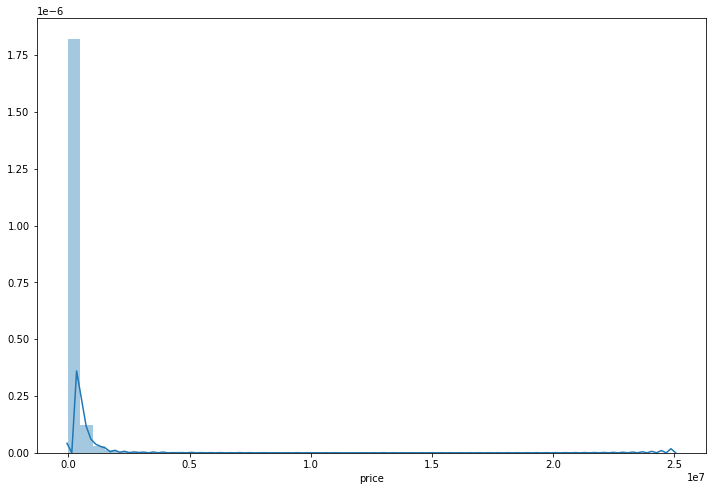

In [24]:
plt.figure(figsize=(12,8))
sns.distplot(df['price'])

In [25]:
df['price'].mean()

247578.8089511041

In [26]:
df['price'].median()

149000.0

In [27]:
df.sort_values('price',ascending=False).head()

,created_on,lat,lon,price,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,rooms,property_type_PH,property_type_apartment,property_type_house,property_type_store,place_name_Almagro,place_name_Bahía Blanca,place_name_Balvanera,place_name_Banfield,place_name_Barracas,place_name_Barrio Norte,place_name_Belgrano,place_name_Boca,place_name_Caballito,place_name_Caseros,place_name_Castelar,place_name_Centro / Microcentro,place_name_Colegiales,place_name_Congreso,place_name_Córdoba,place_name_Escobar,place_name_Flores,place_name_Floresta,place_name_Florida,place_name_General San Martín,place_name_Haedo,place_name_Ituzaingó,place_name_La Matanza,place_name_La Plata,place_name_Lanús,place_name_Lomas de Zamora,place_name_Maldonado,place_name_Mar del Plata,place_name_Martínez,place_name_Mataderos,place_name_Monserrat,place_name_Montevideo,place_name_Morón,place_name_Nordelta,place_name_Nuñez,place_name_Olivos,place_name_Once,place_name_Palermo,place_name_Palermo Hollywood,place_name_Pilar,place_name_Pinamar,place_name_Puerto Madero,place_name_Punta del Este,place_name_Ramos Mejía,place_name_Recoleta,place_name_Saavedra,place_name_San Antonio De Padua,place_name_San Cristobal,place_name_San Fernando,place_name_San Isidro,place_name_San Justo,place_name_San Miguel,place_name_San Telmo,place_name_Santos Lugares,place_name_Tigre,place_name_Tres de Febrero,place_name_Vicente López,place_name_Villa Ballester,place_name_Villa Crespo,place_name_Villa Devoto,place_name_Villa Urquiza,place_name_Villa del Parque
43318,2015-10-20,-34.936879,-54.928150,25000000.0,130000.0,4000.0,192.307692,10.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
109757,2016-08-25,-34.904653,-54.966112,13000000.0,12000.0,870.0,1083.333333,8.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
69790,2016-04-23,-34.936879,-54.928150,12000000.0,367.0,367.0,32697.547684,7.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
143100,2016-10-28,-34.463217,-58.556603,11111111.0,1902.0,404.0,5841.803891,5.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
25831,2015-06-14,-34.447361,-58.631426,9550360.0,137.0,137.0,69710.656934,3.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


#supprimer 20% de la dataset (maison ayant un prix trop élevé)

In [28]:
len(df)*(0.20)

5072.0

In [0]:
df = df.sort_values('price',ascending=False).iloc[5073:]

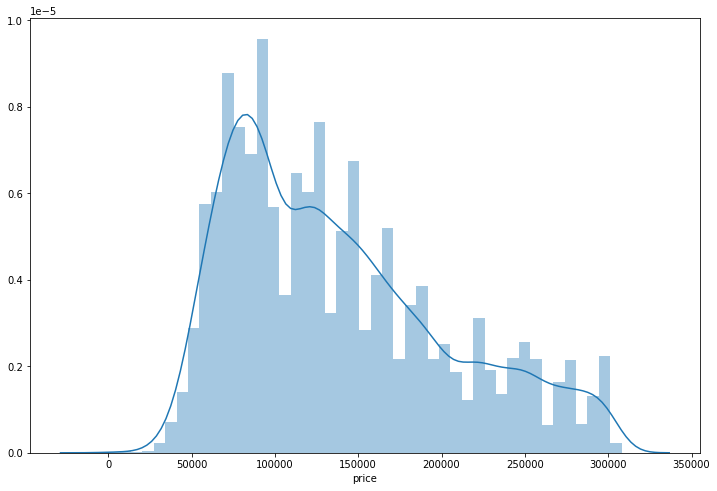

In [30]:
plt.figure(figsize=(12,8))
sns.distplot(df['price'])

#Feature Engineering pour la Date

In [0]:
df['created_on'] = pd.to_datetime(df['created_on'])
df['month'] = df['created_on'].apply(lambda date:date.month)
df['year'] = df['created_on'].apply(lambda date:date.year)
df = df.drop('created_on',axis=1)

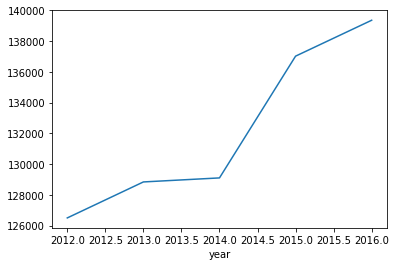

In [46]:
df.groupby('year').mean()['price'].plot()

#Mise à l'échelle et Train Test Split

In [0]:
X = df.drop('price',axis=1).values
y = df['price'].values

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=101)

In [0]:
scaler = MinMaxScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [35]:
df.shape

(20287, 75)

#Création d'un modèle

In [36]:
# Build the neural network
model = Sequential()
model.add(Dense(units=100, activation='relu', input_shape=(74, ))) # Hidden 1
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(1)) # Output
model.compile(loss='mean_squared_error', optimizer='adam')
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, 
                        patience=5, verbose=1, mode='auto', restore_best_weights=True)
model.fit(X_train,y_train,validation_data=(X_test,y_test),callbacks=[monitor],verbose=2,epochs=1000)

Epoch 1/1000
476/476 - 1s - loss: 5275598336.0000 - val_loss: 2145268352.0000
Epoch 2/1000
476/476 - 1s - loss: 1815822464.0000 - val_loss: 1870919424.0000
Epoch 3/1000
476/476 - 1s - loss: 1643881216.0000 - val_loss: 1780700544.0000
Epoch 4/1000
476/476 - 1s - loss: 1532351104.0000 - val_loss: 1657292800.0000
Epoch 5/1000
476/476 - 1s - loss: 1483727744.0000 - val_loss: 1924537600.0000
Epoch 6/1000
476/476 - 1s - loss: 1429909504.0000 - val_loss: 1516077824.0000
Epoch 7/1000
476/476 - 1s - loss: 1383971584.0000 - val_loss: 1464350080.0000
Epoch 8/1000
476/476 - 1s - loss: 1343433984.0000 - val_loss: 1460277888.0000
Epoch 9/1000
476/476 - 1s - loss: 1307060608.0000 - val_loss: 1371535744.0000
Epoch 10/1000
476/476 - 1s - loss: 1258933120.0000 - val_loss: 1332361984.0000
Epoch 11/1000
476/476 - 1s - loss: 1216658688.0000 - val_loss: 1357067392.0000
Epoch 12/1000
476/476 - 1s - loss: 1169295488.0000 - val_loss: 1210486528.0000
Epoch 13/1000
476/476 - 1s - loss: 1106793344.0000 - val_loss

<Figure size 864x576 with 0 Axes>

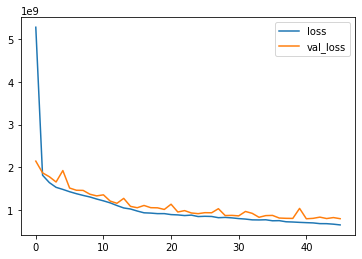

In [37]:
plt.figure(figsize=(12,8))
losses = pd.DataFrame(model.history.history)
losses.plot()

#Évaluation sur les données de test

In [38]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

predictions = model.predict(X_test)

MSE = mean_squared_error(y_test,predictions)
RMSE = np.sqrt(mean_squared_error(y_test,predictions))
MAE = mean_absolute_error(y_test,predictions)
EVS = explained_variance_score(y_test,predictions)
print("MSE : {}".format(MSE))
print("RMSE : {}".format(RMSE))
print("MAE : {}".format(MAE))
print("EVS : {}".format(EVS))

MSE : 797089387.765274
RMSE : 28232.771521146733
MAE : 18450.671895024152
EVS : 0.8168165743533169


In [0]:
def chart_regression(pred, y, sort=True):
    plt.figure(figsize=(12,8))
    t = pd.DataFrame({'pred': pred, 'y': y.flatten()})
    if sort:
        t.sort_values(by=['y'], inplace=True) 
    plt.plot(t['pred'].tolist(), label='prediction')
    plt.plot(t['y'].tolist(), label='expected')
    plt.ylabel('output')
    plt.legend()
    plt.show()

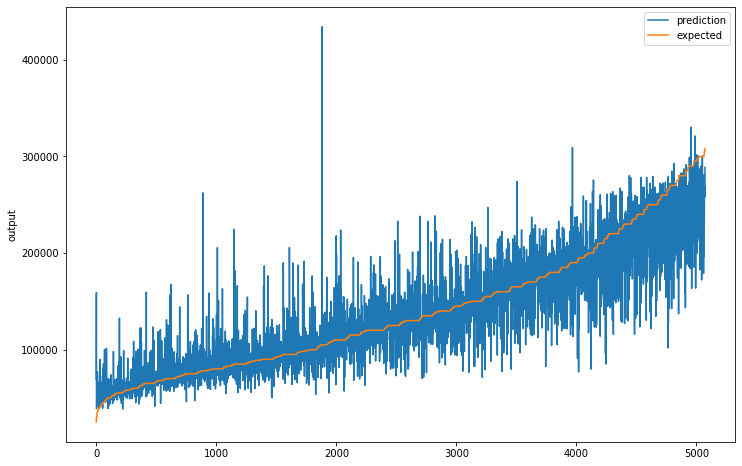

In [40]:
chart_regression(predictions.flatten(),y_test)

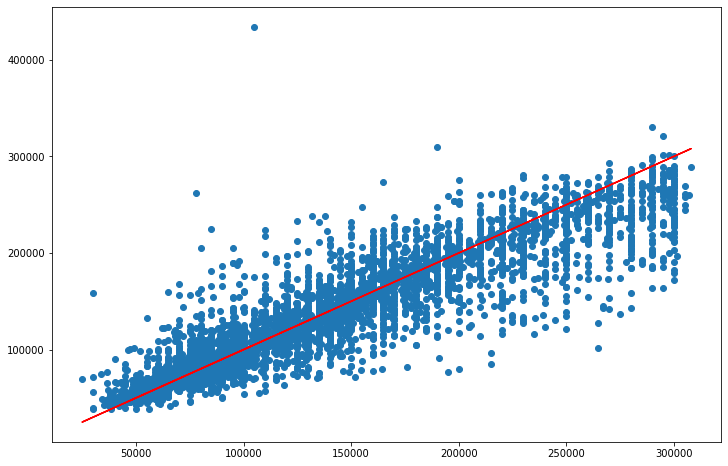

In [41]:
plt.figure(figsize=(12,8))
# Our predictions
plt.scatter(y_test,predictions)

# Perfect predictions
plt.plot(y_test,y_test,'r')

In [42]:
df['price'].mean()

138125.89564745896

In [43]:
df['price'].median()

125000.0

In [44]:
df.shape

(20287, 75)